In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm


In [2]:
def myerrorplot(df,item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    titlestring = item_dict[item]+' ('+item+')'
    fig.suptitle(titlestring, fontsize=16)

    # This works:
    # df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0])

    # But here with error bars
    qual = df.groupby(df["endtime"].dt.to_period("M"))[item].agg([np.mean, np.std])
    qual.plot(kind = "bar", y = "mean", legend = False, yerr = "std", color='green',ax=axs[0])
    df[item].hist(orientation="horizontal",color='green',ax=axs[1])
    
def mybarplot(df,item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    titlestring = item_dict[item]+' ('+item+')'
    fig.suptitle(titlestring, fontsize=16)
    df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0])
    df[item].hist(orientation="horizontal",ax=axs[1])
    
def myhistplot(df,item): 
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))
    titlestring = item_dict[item]+' ('+item+')'
    fig.suptitle(titlestring, fontsize=16)
    df[item].hist(orientation="vertical",ax=ax)
    
    
def correvoplot(df,items,periods):
    #periods = ['2020-04','2020-10','2021-04','2021-10','2022-04']
    correlations = []
    old_period = '2020-04'
    for px,period in enumerate(periods[1:len(periods)]):
        #print(period)
        correlations.append( df.loc[(df["endtime"] <= period) & (df["endtime"] > old_period),items].corr().iloc[0][1])
        old_period = period
    #correlations

    x = periods[1:len(periods)]
    y = correlations

    fig = plt.figure(figsize=(12, 6))
    plt.xlabel("period")
    plt.ylabel("correlation")
    #plt.title("correlation over periods ("+item_dict[items[0]]+' x '+item_dict[items[0]]+')')
    plt.title("correlation over periods ("+items[0]+' x '+items[1]+')')
    plt.plot(x,y)
    #plt.legend()
    #plt.figsize(20,10)
    plt.show()
    
def corrallevoplot(df,item,otheritems,periods):
    
    fig = plt.figure(figsize=(20, 10))
    plt.xlabel("period")
    plt.ylabel("correlation")
    plt.title("correlation over periods")
    for other in otheritems: 
        if item != other:
            #print(other)
            correlations = []
            old_period = '2020-04'
            for px,period in enumerate(periods[1:len(periods)]):
                #print(period)
                correlations.append( df.loc[ (df["endtime"] <= period) & (df["endtime"] > old_period),[item,other] ].corr().iloc[0][1])
                old_period = period
                #correlations

            x = periods[1:len(periods)]
            y = correlations
            plt.plot(x,y,label='('+item+' x '+other+')')

    #plt.legend(loc='best')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=4)
    plt.show()    
    

In [3]:
country = 'germany'

datapath = '../data/'
filename = f'all_countries_numerical_'+country
ext = '.csv'

allcols=['recordno','endtime','qweek','i1_health','i2_health','i7a_health','i3_health','i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99','i5a_health','i6_health','i7b_health','i8_health','i9_health','i10_health','i11_health','i12_health_1','i12_health_2','i12_health_3','i12_health_4','i12_health_5','i12_health_6','i12_health_7','i12_health_8','i12_health_9','i12_health_10','i12_health_11','i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_17','i12_health_18','i12_health_19','i12_health_20','i13_health','i14_health_1','i14_health_2','i14_health_3','i14_health_4','i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96','i14_health_98','i14_health_99','i14_health_other','d1_health_1','d1_health_2','d1_health_3','d1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9','d1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_98','d1_health_99','weight','age','gender','state','household_size','employment_status','wcrex2','wcrv_4','core_b2_4','cantril_ladder','phq4_1','phq4_2','phq4_3','phq4_4','m1_1','m1_2','m1_3','m1_4','m2','m3','m4_1','m4_2','m4_3','m4_4','m4_96','m4_99','m4_other','m5_1','m5_2','m6_1','m6_2','m6_3','m6_4','m6_5','m6_6','m6_7','m6_8','m6_96','m6_other','m7_1','m7_2','m7_3','m7_4','m7_5','m7_6','m7_8','m7_9','m7_10','m7_11','m8_1','m8_2','m8_3','m8_4','m8_5','m8_6','m8_7','m8_8','m8_96','m8_99','m8_other','m9_1','m9_2','m9_3','m9_4','m9_5','m9_6','m9_7','m10','m11','m12_1','m12_2','m12_3','m12_4','m12_5','m12_6','m12_7','m12_8','m12_96','m12_99','m12_other','m13_1','m13_2','m13_3','m13_4','m13_5','m13_6','m13_8','m13_9','m13_10','m13_11','v1','v2_1','v2_2','v2_3','v2_4','v2_5','v2_99','v3','v3_open','v4_1','v4_2','v4_3','v4_4','v4_5','v4_96','v4_99','v3_other','wcrex1','i12_health_21','i12_health_22','i12_health_23','i12_health_24','i12_health_25','r1_1','r1_2','r1_3','r1_4','r1_5','r1_6','r1_7','m7_other','m14_1','m14_2','m14_3','m14_4','m14_5','m14_6','m14_7','m14_8','m14_9','m14_10','m14_11','m14_96','m14_99','m14_open','i14_health_11','ct1_1','ct1_2','ct1b_1','ct1b_2','ct1b_3','ct1b_4','ct1b_5','ct1b_6','ct1b_7','ct1b_8','ct1b_9','ct1b_10','ct1b_11','ct1b_96','ct1b_99','ct1b_other','ct2','ct3','ct3_other','ct4','ct5_1','ct5_2','ct5_3','ct5_4','ct5_5','ct5_6','ct5_7','ct5_8','ct5_96','ct5_99','ct5_other','ct6_1','ct6_2','ct6_3','ct6_4','ct6_5','ct6_6','ct6_96','ct6_99','ct6_other','ct7_1','ct7_2','ct7_3','ct8_1','ct8_2','ct8_3','ct8_4','ct8_5','ct8_6','ct8_99','i12_health_26','ox1_1','ox1_2','ox3_1','ox3_2','ox3_3','ox3_4','ox3_5','ox3_6','ox5_1','ox5_2','ox6','ox4_1_1','ox4_2_1','ox4_3_1','ox4_4_1','ox4_5_1','ox4_6_1','ox4_7_1','ox4_8_1','ox4_9_1','ox4_10_1','ox4_11_1','w1','w2','w3','w4_1','w4_2','w4_3','w4_4','w4_5','w4_6','w4_7','w4_8','w4_9','w4_10','w4_11','w4_99','w4b','w5_1','w5_2','w5_3','w5_4','w5_5','w5_6','w5_7','w5_8','w5_9','w5_10','w5_11','w5_12','w5_13','w5_14','w5_15','w5_16','w5_96','w5_99','w6','w7','w9_1','w9_2','w9_3','w9_4','w9_5','disability','work1','work2','work3','work4','work5','work6','work7_1','work7_2','work7_3','work7_4','work7_5','work8','i12_health_27','i12_health_28','i12_health_29','soc1_1','soc1_2','soc1_3','soc2_1','soc2_2','soc2_3','soc2_4','soc2_5','soc2_6','soc2_open','vac_1','vac_2','vac2_1','vac2_2','vac2_3','vac2_4','vac2_5','vac2_6','vac_3','vac3_1','vac3_2','vac3_3','vac3_4','vac3_5','vac3_6','vac3_7','vac3_8','vac3_9','vac3_other','vac4','vac5','vac6','vac7','vac8','av1_1','av1_2','av1_3','av1_99','av2','r1_8','r1_9','r1_10','vac2_7','av3','vac','vac9','vac10_1','vac10_2','vac10_3','vac10_4','vac10_5','vac10_99','vac11','travel1_1','travel1_2','travel1_3','travel1_4','travel1_99','vac12_1','vac12_2','vac12_3','vac12_4','vac12_11','vac12_5','vac12_6','vac12_7','vac12_8','vac12_9','vac12_10','vac12_96','vac12_other','vac13','vac10_8','vac_booster','vac12_12','vac12_13','vac14_1','vac14_2','vac14_3','child_age_1','child_age_2','child_age_3','child_age_4','child_age_5','child_education_1','child_education_2','child_education_3','child_education_4','childvac','combi_vac','household_children','vent_1','vent_2','vent_3','wah_1','wah_2','wah_3','wah4','wah5','wah7_1','wah7_2','wah7_3','wah7_4','wah7_5','wah7_6','wah7_7','wah7_99','wah6','v1_1','v1_2','v1_3','v1_98','v3_me','v3_me_other','v3_baby','v3_baby_other','v3_child2_4','v3_child2_4_other','v3_child5_17','v3_child5_17_other','v3_adult18','v3_adult18_other','v4_8','v4_9','v4_6','v4_98','v4_other','sc_1_1','sc_1_2','sc_1_3','sc_1_4','sc_1_5','sc_1_6','sc_1_7','sc_1_99','sc_2','sc_3_1','sc_3_2','sc_3_3','sc_3_4','sc_3_5','sc_3_6','sc_3_7','sc_3_99','vac_boost_1','vac_boost_2','vac12_booster_1','vac12_booster_2','vac12_booster_3','vac12_booster_4','vac12_booster_5','vac12_booster_6','vac12_booster_7','vac12_booster_8','vac12_booster_9','vac12_booster_10','vac12_booster_96','vac12_booster_other','vac_man_1','vac_man_2','vac_man_3','vac_man_4','vac_man_5','vac_man_6','vac_man_7','vac_man_96','vac_man_99','q_other','household_children_resp','had_covid','vac_boost_beyond','future_1','future_2','had_covid_2','long_covid','future_3','country','case_id','region','employment_status_1','employment_status_2','employment_status_3','employment_status_4','employment_status_5','employment_status_6','employment_status_7','profile_work_stat','i5_health_98','ct5_9','disability_eu','w4_98','w5_98','record','house_rooms','sw_1_1','sw_1_2','sw_1_3','sw_1_4','sw_1_5','sw_1_6','sw_1_7','sw_1_8','sw_1_9','sw_1_10','sw_1_11','sw_1_12','sw_1_13','sw_1_14','sw_1_15','sw_1_98','sw_1_other','sw_2','s1_1','s1_2','s1_3','s1_4','s1_5','s1_6','s1_7','s1_8','s1_9','s1_10','s1_11','s1_12','s1_13','s1_14','s1_17','s1_15','s1_16','inputstate','profile_household_children','city','region_fi','house1','house2','q3_1','q3_2','q3_3','q3_4','i12_health_21_ph','i12_health_22_ph','i12_health_23_ph']

dfo = pd.read_csv(datapath+filename+ext, usecols=allcols)

print('Original data loaded. It is of size:',dfo.shape)

dfo['endtime']=pd.to_datetime(dfo['endtime'],dayfirst=True)

print('Adjust times done.\n')

print('Cell Completed!\n')





/Users/seven/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (76,428,451,453,455,457,459,464,495,505) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Original data loaded. It is of size: (54505, 579)
Adjust times done.

Cell Completed!



In [4]:
start = '2021-04'
end = '2022-05'

df = dfo.loc[ (dfo["endtime"] < end) & (dfo["endtime"] >= start) ].copy()

df.shape


(26230, 579)

i12_health_2 :  96.08463591307662  :  Washed hands with soap and water


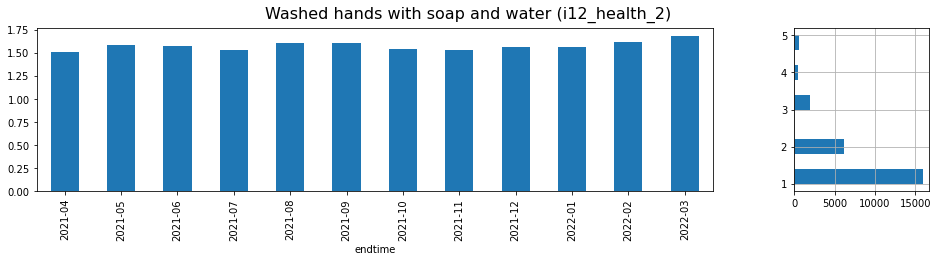

In [17]:
col = 'i12_health_2'
mybarplot(df,col)
print(col,': ',item_coverage_dict[col] , ' : ', item_dict[col])
#print(df[col])

In [ ]:
#check = df[col].isna()
#print(check)

In [ ]:
#check.astype(int).plot()

In [6]:
# Set desired response rates
coverage_min = 66.0
coverage_max = 100.0 

# This is the dataframe we will use
#df = dfo.copy()

filename = 'codebook_sb'
ext = '.xlsx'

df_codebook = pd.read_excel(datapath+filename+ext)

item_dict = {}

idx = df_codebook.index[df_codebook['col3'] == 'Value'].tolist()
for ix in idx:
    if df_codebook.iloc[ix-1,0].lower() in allcols:
        item_dict.update( { df_codebook.iloc[ix-1,0].lower() : df_codebook.iloc[ix+1,2] } )
        
print('Get code book information done.\n')


print('Remove items based on coverage ...') 
item_coverage_dict = {}

for col in df:
    nans = df[col].isna()
    coverage = 100 - 100*nans.mean()
    #print(col,' : ',percentage,'%')
    item_coverage_dict.update({ col:coverage})
    
print('- compute coverage done.')    

deleted_cols = []

#print('Will be deleted:')
for col in df:
    if df[col].dtype == 'float64':
        coverage = item_coverage_dict[col]
        if ((coverage < coverage_min) or (coverage > coverage_max)):
            df = df.drop(columns=[col])
            deleted_cols.append(col)
            #print(col)

print('- removal done.')            
print('- items with coverage between',coverage_min,'% and',coverage_max,'% will be removed.\n\n')

print('Remove non-numerical items ...')
keep = ['endtime','gender','employment_status','state','disability','household_children','household_size', 'country' ]
for col in df:
    if df[col].dtype == 'object':
        if col not in keep:
            #print(col)
            df = df.drop(columns=[col])
            deleted_cols.append(col)

remaining_cols = list(df.columns)

print('\nCell Completed!\n')
print('The remaining data is of size:',df.shape)

Get code book information done.

Remove items based on coverage ...
- compute coverage done.
- removal done.
- items with coverage between 66.0 % and 100.0 % will be removed.


Remove non-numerical items ...

Cell Completed!

The remaining data is of size: (26230, 77)


In [ ]:
#remaining_cols

In [32]:
others = ['i9_health','i11_health']
items_behavior = [ i for i in remaining_cols if 'i12_health' in i]

items_opinion = ['wcrex1','wcrex2','cantril_ladder','vac7']
items_wellbeing = [ i for i in remaining_cols if 'phq4_' in i]
items_risk = [ i for i in remaining_cols if 'r1_' in i]
items_vac = [ i for i in remaining_cols if 'vac2' in i]

items_exclude = [ i for i in remaining_cols if 'd1_health' in i]
items_exclude.extend(['weight','age','household_size','gender','employment_status','recordno','qweek'])

items_selection = ['endtime']+others+items_behavior+items_opinion+items_wellbeing+items_risk+items_vac

for col in df:
    if (col != 'state') & (col != 'disability') & (col != 'country') & (col != 'case_id'):
        if col not in items_selection:
            if col not in items_exclude:
                print(col,': ',item_coverage_dict[col] , ' : ', item_dict[col])




i2_health :  92.2531452535265  :  Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?
soc1_1 :  88.29965688143348  :  In an outdoor place in a group of 6 or more people
soc1_2 :  88.29965688143348  :  In an indoor place in a group of 6 or more people
soc1_3 :  88.29965688143348  :  Neither
vac :  100.0  :  Have you had the first or second doses of a Coronavirus (COVID-19) vaccine?
travel1_1 :  80.78536027449485  :  Travel outside the country they legally reside in
travel1_2 :  80.78536027449485  :  Enter a country where they are not a legal resident
travel1_3 :  80.78536027449485  :  Travel outside the local area they reside in (for example, outside their state or county)
travel1_4 :  80.78536027449485  :  Be allowed by their employer to go to work in person, if they can work from home
travel1_99 :  80.78536027449485  :  None of the above, vaccination proof should not be needed for any of these.
househ

In [33]:
print(items_selection)
item_dict['i2_health']

dfSel = df[items_selection].copy()
dfSel.shape
dfSel.head()

['endtime', 'i9_health', 'i11_health', 'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6', 'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14', 'i12_health_15', 'i12_health_16', 'i12_health_22', 'i12_health_23', 'i12_health_25', 'i12_health_26', 'i12_health_27', 'i12_health_28', 'i12_health_29', 'wcrex1', 'wcrex2', 'cantril_ladder', 'vac7', 'phq4_1', 'phq4_2', 'phq4_3', 'phq4_4', 'r1_1', 'r1_2', 'r1_8', 'r1_9', 'vac2_1', 'vac2_2', 'vac2_3', 'vac2_7']


,endtime,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,...,phq4_3,phq4_4,r1_1,r1_2,r1_8,r1_9,vac2_1,vac2_2,vac2_3,vac2_7
28275,2021-04-07 10:50:00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,...,2.0,1.0,7.0,3.0,6.0,6.0,2.0,3.0,2.0,2.0
28276,2021-04-07 10:52:00,99.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,4.0,6.0,5.0,7.0,4.0,2.0,4.0,4.0,4.0
28277,2021-04-07 10:56:00,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,99.0,7.0,1.0,7.0,7.0,3.0,5.0,1.0,1.0
28278,2021-04-07 11:13:00,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,...,4.0,2.0,7.0,3.0,1.0,7.0,2.0,1.0,2.0,5.0
28279,2021-04-07 11:16:00,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,7.0,7.0,4.0,4.0,1.0,3.0


In [34]:

#dfSel.loc[ (dfSel["i9_health"] == 99)] = np.NaN
#dfSel.loc[ (dfSel["i11_health"] == 99)] = np.NaN
#dfSel.loc[ (dfSel["wcrex1"] == 5)] = np.NaN
#dfSel.loc[ (dfSel["wcrex2"] == 5)] = np.NaN

dfSel['i9_health'] = dfSel['i9_health'].replace(99.0,np.NaN)
dfSel['i11_health'] = dfSel['i11_health'].replace(99.0,np.NaN)
dfSel['wcrex1'] = dfSel['wcrex1'].replace(5.0,np.NaN)
dfSel['wcrex2'] = dfSel['wcrex2'].replace(99.0,np.NaN)

#dfSel.loc[ (dfSel["vac7"])] = - dfSel.loc[ (dfSel["vac7"])] + 5

#dfSel['vac7'] = df['vac7'] * (-1) + 5

#dfSel.loc[ (dfSel["phq4_1"] == 99)] = np.NaN
#dfSel.loc[ (dfSel["phq4_2"] == 99)] = np.NaN
#dfSel.loc[ (dfSel["phq4_3"] == 99)] = np.NaN
#dfSel.loc[ (dfSel["phq4_4"] == 99)] = np.NaN

dfSel['phq4_1'] = dfSel['phq4_1'].replace(99.0,np.NaN)          
dfSel['phq4_2'] = dfSel['phq4_2'].replace(99.0,np.NaN) 
dfSel['phq4_3'] = dfSel['phq4_3'].replace(99.0,np.NaN)
dfSel['phq4_4'] = dfSel['phq4_4'].replace(99.0,np.NaN) 

#dfSel['r1_1'] = df['r1_1'] * (-1) + 8
#dfSel['r1_2'] = df['r1_2'] * (-1) + 8
#dfSel['r1_8'] = df['r1_8'] * (-1) + 8
#dfSel['r1_9'] = df['r1_9'] * (-1) + 8


#for col in dfSel:
#    if col not in items_behavior and col != 'endtime':
#        mybarplot(dfSel,col)

In [31]:
dfSel.head()

,endtime,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,...,phq4_3,phq4_4,r1_1,r1_2,r1_8,r1_9,vac2_1,vac2_2,vac2_3,vac2_7
28275,2021-04-07 10:50:00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,...,2.0,1.0,7.0,3.0,6.0,6.0,2.0,3.0,2.0,2.0
28276,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28277,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28278,2021-04-07 11:13:00,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,...,4.0,2.0,7.0,3.0,1.0,7.0,2.0,1.0,2.0,5.0
28279,2021-04-07 11:16:00,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,7.0,7.0,4.0,4.0,1.0,3.0


In [10]:

#dfSel.head()


for col in dfSel:
    print('[{',col,'},{' , item_dict[col] , '}]')


[{ endtime },{ When did you complete this qx (epoch seconds)? }]
[{ i9_health },{ Thinking about the next 7 days… would you isolate yourself after feeling unwell or having any of the following new symptoms: a dry cough, fever, loss of sense of smell, loss of sense of taste, shortness of breath or difficulty breathing? }]
[{ i11_health },{ If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days? }]
[{ i12_health_1 },{ Worn a face mask outside your home (e.g. when on public transport, going to a supermarket, going to a main road) }]
[{ i12_health_2 },{ Washed hands with soap and water }]
[{ i12_health_3 },{ Used hand sanitiser }]
[{ i12_health_4 },{ Covered your nose and mouth when sneezing or coughing }]
[{ i12_health_5 },{ Avoided contact with people who have symptoms or you think may have been exposed to the coronavirus }]
[{ i12_health_6 },{ Avoided going out in general }]
[{ i12_health_7 },

In [19]:
dfSel.head()

,endtime,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,...,phq4_3,phq4_4,r1_1,r1_2,r1_8,r1_9,vac2_1,vac2_2,vac2_3,vac2_7
28275,2021-04-07 10:50:00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,...,2.0,1.0,7.0,3.0,6.0,6.0,2.0,3.0,2.0,2.0
28276,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28277,2021-04-07 10:56:00,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,NaN,7.0,1.0,7.0,7.0,3.0,5.0,1.0,1.0
28278,2021-04-07 11:13:00,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,...,4.0,2.0,7.0,3.0,1.0,7.0,2.0,1.0,2.0,5.0
28279,2021-04-07 11:16:00,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,7.0,7.0,4.0,4.0,1.0,3.0


In [25]:
df.head()
#print(dfSel.loc[28276])

,recordno,endtime,qweek,i2_health,i9_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,...,vac2_7,vac,travel1_1,travel1_2,travel1_3,travel1_4,travel1_99,household_children,country,case_id
28275,28277.0,2021-04-07 10:50:00,29.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0,germany,28278.0
28276,28278.0,2021-04-07 10:52:00,29.0,2.0,99.0,4.0,1.0,2.0,2.0,1.0,...,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0,germany,28279.0
28277,28279.0,2021-04-07 10:56:00,29.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0,germany,28280.0
28278,28280.0,2021-04-07 11:13:00,29.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,...,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0,germany,28281.0
28279,28281.0,2021-04-07 11:16:00,29.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,...,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0,germany,28282.0


In [ ]:
#dfSel.shape

gitpath = '../data/'
filename = 'selectionDPG2023'
ext = '.csv'
dfSel.to_csv(gitpath+filename+'_'+country+ext)

